# Exámen Diplomatura Ciencia de Datos 3º Bimestre

Este segundo notebook contiene el código para fraccionar el dataset en la franja a predecir.

## Datos del Grupo

Nombre y Apellido | LU
------------------|---
CROMBERG JAVIER EUGENIO | 1153099
CRUZ PINEDA FABIAN | 1099002
GARCIA CAROLINA | 1157796
GIULIANO AUGUSTO | 1157378
INZA ROBERTO | 1151488
URRACO EZEQUIEL| 1159531

---



# TP Predicción de abandono de clientes

# 3. Preparación de los Datos para su uso


## 3.1 Librerias

In [ ]:
from datetime import datetime
inicial_date = datetime.now()

# Librerias básicas
import pandas as pd
import numpy as np
from scipy.stats import iqr
from collections import Counter

# Libreria de visiaulización
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from matplotlib.colors import ListedColormap

# Asociadas con la creacion del modelo
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, KFold,GridSearchCV
import sklearn.metrics #import precision_recall_curve, accuracy_score,roc_auc_score, auc, roc_curve, confusion_matrix, ConfusionMatrixDisplay, classification_report,precision_score,recall_score,RocCurveDisplay,get_scorer_names, log_loss
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest, SelectPercentile, RFE, chi2, f_classif, f_regression
#import category_encoders as ce

# Modelos / Algoritmos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier,VotingClassifier,BaggingClassifier
from sklearn.naive_bayes import GaussianNB
#from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Librerías para Análisis Estadístico
from scipy import stats
import statsmodels.stats as sm
import statsmodels.api as sma
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import fisher_exact, chi2_contingency


## 3.2 Carga de Datos

In [ ]:
# Permite la visualización de todas las columnas
pd.options.display.max_columns = None

In [ ]:
# Para ingresar a traves de colab

from google.colab import drive
drive.mount('/content/drive')

url = "/content/drive/My Drive/DataScience/Banco/MESES_201402_201404.csv"
df = pd.read_csv(url, low_memory = False)


Mounted at /content/drive


In [ ]:
# Levanto el csv como un df de Pandas
# df contiene todos los datos 01-2013 a 04-2014

# df = pd.read_csv('MESES_hasta_201404.csv')#, low_memory = False)

## 3.3 Limpieza y Correción de Datos

### a. Creación de la variable Target

In [ ]:
# Drop de filas con numero_de_cliente = 3333 con datos erroneos
df_idx=df[df["numero_de_cliente"]==3333].index
df=df.drop(df_idx)

In [ ]:
# Filtro mes 2014
df2=df[df.foto_mes == 201404]
df2.head()

,Unnamed: 0,numero_de_cliente,foto_mes,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,tpaquete_premium,tpaquete2,tpaquete3,tpaquete4,tpaquete5,tpaquete6,tpaquete7,tpaquete8,tpaquete9,tcuentas,tcuenta_corriente,mcuenta_corriente_Nopaquete,mcuenta_corriente_Paquete,mcuenta_corriente_dolares,tcaja_ahorro,mcaja_ahorro_Paquete,mcaja_ahorro_Nopaquete,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ctarjeta_visa_transacciones,mtarjeta_visa_consumo,ttarjeta_master,ctarjeta_master_transacciones,mtarjeta_master_consumo,cprestamos_personales,mprestamos_personales,cprestamos_prendarios,mprestamos_prendarios,cprestamos_hipotecarios,mprestamos_hipotecarios,tplazo_fijo,mplazo_fijo_dolares,mplazo_fijo_pesos,tfondos_comunes_inversion,mfondos_comunes_inversion_pesos,mfondos_comunes_inversion_dolare,ttitulos,mtitulos,tseguro_vida_mercado_abierto,tseguro_auto,tseguro_vivienda,tseguro_accidentes_personales,tcaja_seguridad,mbonos_gobierno,mmonedas_extranjeras,minversiones_otras,tplan_sueldo,mplan_sueldo,mplan_sueldo_manual,cplan_sueldo_transaccion,tcuenta_debitos_automaticos,mcuenta_debitos_automaticos,ttarjeta_visa_debitos_automatico,mttarjeta_visa_debitos_automatic,ttarjeta_master_debitos_automati,mttarjeta_master_debitos_automat,tpagodeservicios,mpagodeservicios,tpagomiscuentas,mpagomiscuentas,ccajeros_propios_descuentos,mcajeros_propios_descuentos,ctarjeta_visa_descuentos,mtarjeta_visa_descuentos,ctarjeta_master_descuentos,mtarjeta_master_descuentos,ccuenta_descuentos,mcuenta_descuentos,ccomisiones_mantenimiento,mcomisiones_mantenimiento,ccomisiones_otras,mcomisiones_otras,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_consultas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_Fvencimiento,Master_Finiciomora,Master_msaldototal,Master_msaldopesos,Master_msaldodolares,Master_mconsumospesos,Master_mconsumosdolares,Master_mlimitecompra,Master_madelantopesos,Master_madelantodolares,Master_fultimo_cierre,Master_mpagado,Master_mpagospesos,Master_mpagosdolares,Master_fechaalta,Master_mconsumototal,Master_tconsumos,Master_tadelantosefectivo,Master_mpagominimo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_Fvencimiento,Visa_Finiciomora,Visa_msaldototal,Visa_msaldopesos,Visa_msaldodolares,Visa_mconsumospesos,Visa_mconsumosdolares,Visa_mlimitecompra,Visa_madelantopesos,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,Visa_mpagominimo,target,target_bin
6,24,5609788,201404,1,0,224,62,239,-83.11,8931.04,395.03,-482.88,74.20,9,S,N,N,N,N,N,N,N,N,S,S,0.0,0.00,0.0,S,4425.95,0.0,0.00,1.17,800.80,S,0,0.00,S,13,6764.47,S,5,5844.66,0,0.00,0,0.0,0,0.0,N,0.0,0.0,N,0.0,0.0,N,0.0,N,N,N,N,N,0,0,0,N,0.00,0.0,0,N,0,S,225.14,N,0,N,0,N,0,0,0.00,1,0.00,0,0.0,0,0,1,338.38,5,453.18,N,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,N,0,S,18,N,0,S,N,S,N,N,0,0.0,0,0.0,S,0,10,88865.58,20170331,NaN,5908.69,5908.69,0,0,0,98741.61,0,0,20140416,5908.69,-5919.28,0,20010227,0,N,N,2983.5,0,10,8

#### Función para Visualización de valores únicos del df

In [ ]:
def unique_values(dataframe):
    for x in range(dataframe.shape[1]):
        print(dataframe.columns[x], "\n", np.sort(dataframe[dataframe.columns[x]].unique()), "\n")

### c. Corrección de Variables
#### 1. Variables Categóricas

In [ ]:
# Tres variables categóricas que serán utilizadas más adelante y no requieren procesamiento de datos

tres_categoricas = ["cliente_vip", "cliente_sucursal", "marketing_coss_selling"]

In [ ]:
# Estas variables son categóricas que se pasan a int para luego usar get_dummies

str_a_01 = ["tpaquete2", "tpaquete4", "tpaquete6", "tpaquete7", "tpaquete9",
            "tcuentas", "tcuenta_corriente", "tcaja_ahorro", "ttarjeta_debito", 
            "ttarjeta_visa", "ttarjeta_master", "tplazo_fijo", "tfondos_comunes_inversion", 
            "ttitulos", "tseguro_vida_mercado_abierto", "tseguro_auto", "tseguro_vivienda", 
            "tseguro_accidentes_personales", "tcaja_seguridad", "tplan_sueldo", "tcuenta_debitos_automaticos", 
            "ttarjeta_visa_debitos_automatico", "ttarjeta_master_debitos_automati", "tpagodeservicios", 
            "tpagomiscuentas", "tcambio_monedas", "tcallcenter", "thomebanking", "tautoservicio",
            "tcajas", "tcajas_depositos", "tcajas_extracciones", "tcajas_otras", "tmovimientos_ultimos90dias", 
            "Master_tconsumos", "Master_tadelantosefectivo", "Visa_tconsumos", "Visa_tadelantosefectivo"]
df2[str_a_01] = df2[str_a_01].replace({"N": 0, "S": 1}).astype("int")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
# Modificamos mdescubierto_preacordado a 0_1
df2['mdescubierto_preacordado'].unique()

array([1.17, 0.  ])

In [ ]:
df2['tdescubierto_preacordado'] = df2['mdescubierto_preacordado']
df2['tdescubierto_preacordado'] = df2['tdescubierto_preacordado'].replace({"N": 0, "S": 1.17}).astype("int")

# Lo agregamos a la lista str_a_01
str_a_01.append('tdescubierto_preacordado')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Utilizando esta función corroboro que no requiere ningún tratamiento de nulos.

unique_values(df2[str_a_01])

tpaquete2 
 [0 1] 

tpaquete4 
 [0 1] 

tpaquete6 
 [0 1] 

tpaquete7 
 [0 1] 

tpaquete9 
 [0 1] 

tcuentas 
 [0 1] 

tcuenta_corriente 
 [0 1] 

tcaja_ahorro 
 [0 1] 

ttarjeta_debito 
 [0 1] 

ttarjeta_visa 
 [0 1] 

ttarjeta_master 
 [0 1] 

tplazo_fijo 
 [0 1] 

tfondos_comunes_inversion 
 [0 1] 

ttitulos 
 [0 1] 

tseguro_vida_mercado_abierto 
 [0 1] 

tseguro_auto 
 [0 1] 

tseguro_vivienda 
 [0 1] 

tseguro_accidentes_personales 
 [0 1] 

tcaja_seguridad 
 [0 1] 

tplan_sueldo 
 [0 1] 

tcuenta_debitos_automaticos 
 [0 1] 

ttarjeta_visa_debitos_automatico 
 [0 1] 

ttarjeta_master_debitos_automati 
 [0 1] 

tpagodeservicios 
 [0 1] 

tpagomiscuentas 
 [0 1] 

tcambio_monedas 
 [0 1] 

tcallcenter 
 [0 1] 

thomebanking 
 [0 1] 

tautoservicio 
 [0 1] 

tcajas 
 [0 1] 

tcajas_depositos 
 [0 1] 

tcajas_extracciones 
 [0 1] 

tcajas_otras 
 [0 1] 

tmovimientos_ultimos90dias 
 [0 1] 

Master_tconsumos 
 [0 1] 

Master_tadelantosefectivo 
 [0 1] 

Visa_tconsumos 
 [0 1] 

Visa_

In [ ]:
# Tres variables son categóricas en las que se reemplazarán los "." por np.nan

str_con_nulos1 = ["marketing_activo_ultimos90dias", "Master_marca_atraso", "Visa_marca_atraso", "Visa_cuenta_estado", "Master_cuenta_estado"]

df2[str_con_nulos1] = df2[str_con_nulos1].replace({".": np.nan}).astype("float")

#### 2. Variables numéricas

In [ ]:
# Variables son numéricas que se pasa de str a float aunque contenga "."

num_con_nulos = ["mprestamos_hipotecarios", "mcuenta_debitos_automaticos", "mttarjeta_visa_debitos_automatic",
              "mttarjeta_master_debitos_automat", "mpagodeservicios", "mpagomiscuentas", "Master_mfinanciacion_limite",
                  "Master_msaldototal", "Master_msaldopesos", "Master_msaldodolares",
                  "Master_mconsumospesos", "Master_mconsumosdolares", "Master_mlimitecompra",
                  "Master_madelantopesos", "Master_madelantodolares", "Master_mpagado",
                  "Master_mpagospesos", "Master_mpagosdolares", "Master_mconsumototal", 
                  "Master_mpagominimo", "Visa_mfinanciacion_limite", "Visa_msaldototal",
                  "Visa_msaldopesos", "Visa_msaldodolares", "Visa_mconsumospesos",
                  "Visa_mconsumosdolares", "Visa_mlimitecompra", "Visa_madelantopesos",
                  "Visa_madelantodolares", "Visa_mpagado", "Visa_mpagospesos", "Visa_mpagosdolares",
                  "Visa_mconsumototal", "Visa_mpagominimo"]

df2[num_con_nulos] = df2[num_con_nulos].replace({".": np.nan}).astype("float")

In [ ]:
# Variables son numéricas que no contienen nulos

num_sin_nulos = ["cliente_edad", "cliente_antiguedad", "mrentabilidad", "mrentabilidad_annual", "mcomisiones",
                 "mactivos_margen", "mpasivos_margen", "mcuenta_corriente_Nopaquete", "mcuenta_corriente_Paquete",
                 "mcaja_ahorro_Paquete", "mcaja_ahorro_Nopaquete", "mcaja_ahorro_dolares", "mcuentas_saldo",
                 "ctarjeta_debito_transacciones", "mautoservicio", "ctarjeta_visa_transacciones", "mtarjeta_visa_consumo",
                 "ctarjeta_master_transacciones", "mtarjeta_master_consumo", "cprestamos_personales", "mprestamos_personales",
                 "cprestamos_prendarios", "mprestamos_prendarios", "cprestamos_hipotecarios", "mplazo_fijo_dolares",
                 "mplazo_fijo_pesos", "mfondos_comunes_inversion_pesos", "mfondos_comunes_inversion_dolare",
                 "mtitulos", "mplan_sueldo", "mplan_sueldo_manual", "cplan_sueldo_transaccion", "ccajeros_propios_descuentos",
                "mcajeros_propios_descuentos", "ctarjeta_visa_descuentos", "mtarjeta_visa_descuentos", "ctarjeta_master_descuentos",
                 "mtarjeta_master_descuentos", "ccomisiones_mantenimiento", "mcomisiones_mantenimiento", "ccomisiones_otras",
                 "mcomisiones_otras", "ccambio_monedas_compra", "mcambio_monedas_compra", "ccambio_monedas_venta",
                 "mcambio_monedas_venta", "ctransferencias_recibidas", "mtransferencias_recibidas", "ctransferencias_emitidas",
                 "mtransferencias_emitidas", "cextraccion_autoservicio", "mextraccion_autoservicio", "ccheques_depositados",
                 "mcheques_depositados", "ccheques_emitidos", "mcheques_emitidos", "ccheques_depositados_rechazados",
                 "mcheques_depositados_rechazados", "ccheques_emitidos_rechazados", "mcheques_emitidos_rechazados",
                 "ccallcenter_transacciones", "chomebanking_transacciones", "cautoservicio_transacciones", "ccajeros_propio_transacciones",
                 "mcajeros_propio", "ccajeros_ajenos_transacciones", "mcajeros_ajenos"] 

In [ ]:
df2[num_sin_nulos].isna().sum().sum()

0

#### 3. Variables datetime

In [ ]:
# Variables de tipo datetime a las que se les quita "." y se pasan a datetime

srt_a_fecha_pto = ["Master_Fvencimiento", "Master_fultimo_cierre", "Master_fechaalta",
                  "Visa_Fvencimiento", "Visa_fultimo_cierre", "Visa_fechaalta"]

df2[srt_a_fecha_pto] = df2[srt_a_fecha_pto].replace({".": np.nan})

In [ ]:
df2[srt_a_fecha_pto] = df2[srt_a_fecha_pto].apply(lambda x: pd.to_datetime(x,errors = 'coerce', format = '%Y-%m-%d'))

In [ ]:
df2[srt_a_fecha_pto].dtypes

Master_Fvencimiento      datetime64[ns]
Master_fultimo_cierre    datetime64[ns]
Master_fechaalta         datetime64[ns]
Visa_Fvencimiento        datetime64[ns]
Visa_fultimo_cierre      datetime64[ns]
Visa_fechaalta           datetime64[ns]
dtype: object

### d. Drop de columnas

In [ ]:
borrar = ["foto_mes", "tpaquete_premium", "tpaquete3", "tpaquete5", "tpaquete8", "tcajas_consultas", 
          "ccuenta_descuentos", "mcuenta_descuentos", "mcuenta_corriente_dolares", "mbonos_gobierno", "mmonedas_extranjeras", 
          "minversiones_otras", "Master_Finiciomora", "Visa_Finiciomora"]

df2 = df2.drop(borrar, axis = 1)

# Por ahora borro también las variables de datos tipo datetime

df2 = df2.drop(srt_a_fecha_pto, axis = 1)


### 3.3.2 Tratamiento de nulos

#### a. Eliminación según % de nulos en cada columna

In [ ]:
pct_nulos = (df2.isna().sum().sort_values(ascending = False) / df2.shape[0] * 100).head(10)
pct_nulos

Master_mpagospesos             47.372100
Master_mconsumospesos          47.372100
Master_mconsumosdolares        47.372100
Master_madelantopesos          47.372100
Master_madelantodolares        47.372100
Master_mpagosdolares           47.372100
Master_mconsumototal           47.372100
Master_mpagominimo             13.957483
Master_marca_atraso            13.957483
Master_mfinanciacion_limite    13.957483
dtype: float64

In [ ]:
# Se proceden a eliminar aquellas columnas con más del %15 de los datos nulos
columnas_nulas = []

for i in range(len(pct_nulos)):
    if pct_nulos.iloc[i] > 15:
        columnas_nulas.append(pct_nulos.index[i])

columnas_nulas

['Master_mpagospesos',
 'Master_mconsumospesos',
 'Master_mconsumosdolares',
 'Master_madelantopesos',
 'Master_madelantodolares',
 'Master_mpagosdolares',
 'Master_mconsumototal']

In [ ]:
df2 = df2.drop(columnas_nulas, axis = 1)

#### b. Eliminación cuando una fila tiene más de la mitad de su valores nulos

In [ ]:
df2.shape

(184539, 146)

In [ ]:
df2.isna().sum().sort_values(ascending = False)

Master_msaldopesos              25757
Master_msaldodolares            25757
Master_mlimitecompra            25757
Master_mpagado                  25757
Master_mfinanciacion_limite     25757
                                ...  
mtitulos                            0
tseguro_vida_mercado_abierto        0
tseguro_auto                        0
tseguro_vivienda                    0
tdescubierto_preacordado            0
Length: 146, dtype: int64

In [ ]:
df2 = df2.dropna(axis = 0, thresh = 77)

In [ ]:
df2.isna().sum().sort_values(ascending = False)

Master_msaldopesos              25757
Master_msaldodolares            25757
Master_mlimitecompra            25757
Master_mpagado                  25757
Master_mfinanciacion_limite     25757
                                ...  
mtitulos                            0
tseguro_vida_mercado_abierto        0
tseguro_auto                        0
tseguro_vivienda                    0
tdescubierto_preacordado            0
Length: 146, dtype: int64

`Aclaración` si bien no hubieron registros con más del 50% de los valores nulos, nos pareció importante que conste esta comprobación

#### c. Columnas object: reemplazo por la moda

In [ ]:
# Tomamos todas las listas con los nombres de las columnas con datos categóricos
col_categoricas = tres_categoricas + str_a_01 + str_con_nulos1

In [ ]:
unique_values(df2[col_categoricas])

cliente_vip 
 [0 1] 

cliente_sucursal 
 [   2   17   20   29   32   41   44   47   50   59   62   68   71   74
   77   80   89   95   98  101  104  107  110  113  116  119  125  128
  131  134  137  143  146  149  152  155  158  161  164  167  170  173
  176  179  182  185  194  200  203  206  209  215  218  221  224  227
  230  233  236  239  245  248  254  257  260  263  266  269  272  275
  281  284  287  293  299  302  305  308  314  323  326  329  332  338
  344  347  350  353  356  359  362  365  371  374  377  380  383  392
  395  398  401  407  422  425  434  440  443  446  449  452  455  458
  461  464  467  470  473  476  479  488  491  494  497  500  503  506
  509  512  518  521  524  527  530  536  539  542  545  548  557  560
  563  566  572  575  578  581  584  587  590  593  599  605  611  614
  617  620  623  626  629  632  638  650  653  656  665  668  677  680
  689  692  701  713  728  737  740  743  752  755  758  761  764  767
  770  782  785  788  794  797  800 

In [ ]:
# Visualizamos las columnas con valores nulos
df2[col_categoricas].isna().sum().sort_values(ascending = False).head(5)

Master_cuenta_estado    25757
Master_marca_atraso     25757
Visa_cuenta_estado      10798
Visa_marca_atraso       10798
tcajas_extracciones         0
dtype: int64

In [ ]:
# Eliminamos los valores nulos por la moda
for i in col_categoricas:
    df2[i] = df2[i].replace({np.nan: df2[i].mode()[0]})

In [ ]:
# Comprobamos que no quedan valores nulos
df2[col_categoricas].isna().sum().sort_values(ascending = False).head(5)

cliente_vip         0
tcajas_otras        0
tpagodeservicios    0
tpagomiscuentas     0
tcambio_monedas     0
dtype: int64

#### d. Columnas num: reemplazo por la media/mediana

In [ ]:
# Generamos una lista con las listas de nombres de columnas con valores numéricos hechas previamente
col_numericas = num_con_nulos + num_sin_nulos

In [ ]:
# Eliminamos los nombres de columnas nulas agrupadas en una lista previa de la lista col_numéricas 
for i in columnas_nulas:
    col_numericas.remove(i)

In [ ]:
# Visualizamos las columnas con valores nulos
df2.isna().sum().sort_values(ascending = False).head(28)

Master_mlimitecompra           25757
Master_mpagominimo             25757
Master_msaldodolares           25757
Master_msaldopesos             25757
Master_mfinanciacion_limite    25757
Master_msaldototal             25757
Master_mpagado                 25757
Visa_madelantodolares          21255
Visa_mconsumospesos            21255
Visa_mconsumosdolares          21255
Visa_madelantopesos            21255
Visa_mpagospesos               21255
Visa_mpagosdolares             21255
Visa_mconsumototal             21255
Visa_mpagado                   10798
Visa_mlimitecompra             10798
Visa_msaldodolares             10798
Visa_msaldototal               10798
Visa_mfinanciacion_limite      10798
Visa_mpagominimo               10798
Visa_msaldopesos               10798
mprestamos_hipotecarios          390
mextraccion_autoservicio           0
cextraccion_autoservicio           0
Unnamed: 0                         0
ccheques_depositados               0
mcheques_depositados               0
c

In [ ]:
# Eliminamos los valores nulos por la mediana
for i in col_numericas:
    df2[i] = df2[i].replace({np.nan: df2[i].median()})

In [ ]:
df2['cliente_edad'].describe()

count    184539.000000
mean         42.748915
std          18.045953
min           0.000000
25%          35.000000
50%          44.000000
75%          55.000000
max         108.000000
Name: cliente_edad, dtype: float64

In [ ]:
df2['cliente_edad'] = df2['cliente_edad'].replace({0: df2['cliente_edad'].median()})

In [ ]:
df2['cliente_edad'].describe()

count    184539.000000
mean         46.855429
std          11.763526
min          18.000000
25%          38.000000
50%          44.000000
75%          55.000000
max         108.000000
Name: cliente_edad, dtype: float64

In [ ]:
# Comprobamos que no quedan valores nulos
df2.isna().sum().sort_values(ascending = False).head(5)

Unnamed: 0                         0
ccajeros_propio_transacciones      0
ccheques_emitidos                  0
mcheques_emitidos                  0
ccheques_depositados_rechazados    0
dtype: int64

In [ ]:
# Comprobación final
df2.isna().sum().sum()

0

## 3.4 Creamos Variables

In [ ]:
df3 = df2.copy()

In [ ]:
df3.columns

Index(['Unnamed: 0', 'numero_de_cliente', 'marketing_activo_ultimos90dias',
       'cliente_vip', 'cliente_sucursal', 'cliente_edad', 'cliente_antiguedad',
       'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       ...
       'Visa_mpagado', 'Visa_mpagospesos', 'Visa_mpagosdolares',
       'Visa_mconsumototal', 'Visa_tconsumos', 'Visa_tadelantosefectivo',
       'Visa_mpagominimo', 'target', 'target_bin', 'tdescubierto_preacordado'],
      dtype='object', length=146)

In [ ]:
len(df3.columns)

146

Analizamos todas las variables con el objetivo de UNIFICAR/CREAR variables

In [ ]:
list(df3.columns)

['Unnamed: 0',
 'numero_de_cliente',
 'marketing_activo_ultimos90dias',
 'cliente_vip',
 'cliente_sucursal',
 'cliente_edad',
 'cliente_antiguedad',
 'mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'marketing_coss_selling',
 'tpaquete2',
 'tpaquete4',
 'tpaquete6',
 'tpaquete7',
 'tpaquete9',
 'tcuentas',
 'tcuenta_corriente',
 'mcuenta_corriente_Nopaquete',
 'mcuenta_corriente_Paquete',
 'tcaja_ahorro',
 'mcaja_ahorro_Paquete',
 'mcaja_ahorro_Nopaquete',
 'mcaja_ahorro_dolares',
 'mdescubierto_preacordado',
 'mcuentas_saldo',
 'ttarjeta_debito',
 'ctarjeta_debito_transacciones',
 'mautoservicio',
 'ttarjeta_visa',
 'ctarjeta_visa_transacciones',
 'mtarjeta_visa_consumo',
 'ttarjeta_master',
 'ctarjeta_master_transacciones',
 'mtarjeta_master_consumo',
 'cprestamos_personales',
 'mprestamos_personales',
 'cprestamos_prendarios',
 'mprestamos_prendarios',
 'cprestamos_hipotecarios',
 'mprestamos_hipotecarios',
 'tplazo_fijo',
 'mplazo_f

In [ ]:
# Unificamos Campos de Caja de Ahorro y Cuenta corriente a sus totales 

df3["mcuenta_corriente_all"] = df3["mcuenta_corriente_Paquete"] + df3["mcuenta_corriente_Nopaquete"]
df3["mcaja_ahorro_all"] = df3["mcaja_ahorro_Paquete"] + df3["mcaja_ahorro_Nopaquete"]
df3["mcaja_ahorro_CC"] = df3["mcaja_ahorro_all"] + df3["mcuenta_corriente_all"]

In [ ]:
# Genero el drop

drop_1 = ["mcuenta_corriente_Paquete", "mcuenta_corriente_Nopaquete", "mcaja_ahorro_Paquete", "mcaja_ahorro_Nopaquete", "mcaja_ahorro_all", "mcuenta_corriente_all"]
df3 = df3.drop(drop_1, axis = 1)

In [ ]:
# Unificamos Campos de Consumo y Transacciones a sus totales 

df3["mtarjeta_all_consumo"] = df3["mtarjeta_visa_consumo"] + df3["mtarjeta_master_consumo"]
df3["ctarjeta_all_transacciones"] = df3["ctarjeta_visa_transacciones"] + df3["ctarjeta_master_transacciones"] + df3["ctarjeta_debito_transacciones"]

In [ ]:
# Genero el drop

drop_2 = ["mtarjeta_visa_consumo", "mtarjeta_master_consumo", "ctarjeta_visa_transacciones", "ctarjeta_master_transacciones"]
df3 = df3.drop(drop_2, axis = 1) 

In [ ]:
# Unificamos Campos de Prestamos a sus totales 

df3["cprestamos_all"] = df3["cprestamos_personales"] + df3["cprestamos_prendarios"] + df3["cprestamos_hipotecarios"]
df3["mprestamos_all"] = df3["mprestamos_personales"] + df3["mprestamos_prendarios"] + df3["mprestamos_hipotecarios"]

In [ ]:
# Genero el drop

drop_3 = ["cprestamos_personales", "cprestamos_prendarios", "cprestamos_hipotecarios", "mprestamos_personales", "mprestamos_prendarios", "mprestamos_hipotecarios"]
df3 = df3.drop(drop_3, axis = 1) 

In [ ]:
# Poner algún título

df3["renta_dolar"] = df3["mplazo_fijo_dolares"] + df3["mfondos_comunes_inversion_dolare"]
df3["renta_pesos"] = df3["mplazo_fijo_pesos"] + df3["mfondos_comunes_inversion_pesos"] + df3["mtitulos"]

In [ ]:
# Genero el drop

drop_4 = ["mplazo_fijo_dolares", "mfondos_comunes_inversion_dolare", "mplazo_fijo_pesos", "mfondos_comunes_inversion_pesos", "mtitulos"]
df3 = df3.drop(drop_4, axis = 1) 

In [ ]:
# Se unifica como "tpaquete"
# Si tiene algún paquete se pone un "1". Sino tiene ningún paquete se pone un 0

df3["tpaquete"] = np.where(df3[["tpaquete2", "tpaquete4", "tpaquete6", "tpaquete7", "tpaquete9"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_5 = ["tpaquete2", "tpaquete4", "tpaquete6", "tpaquete7", "tpaquete9"]
df3 = df3.drop(drop_5, axis = 1) 

In [ ]:
# Se unifica como "tcuenta"
# Al igual que con la variable "tpaquete generada arriba"

df3["tcuenta"] = np.where(df3[["tcuentas", "tcuenta_corriente", "tcaja_ahorro"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_6 = ["tcuentas", "tcuenta_corriente", "tcaja_ahorro"]
df3 = df3.drop(drop_6, axis = 1) 

In [ ]:
# Se unifica como "trenta"
# Al igual que con la variable "tcuenta" generada arriba

df3["trenta"] = np.where(df3[["tplazo_fijo", "tfondos_comunes_inversion", "ttitulos"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_7 = ["tplazo_fijo", "tfondos_comunes_inversion", "ttitulos"]
df3 = df3.drop(drop_7, axis = 1) 

In [ ]:
# Se unifica como "tseguro"
# Al igual que con la variable "trenta" generada arriba

df3["tseguro"] = np.where(df3[["tseguro_vida_mercado_abierto", "tseguro_auto", "tseguro_vivienda", "tseguro_accidentes_personales"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_8 = ["tseguro_vida_mercado_abierto", "tseguro_auto", "tseguro_vivienda", "tseguro_accidentes_personales"]
df3 = df3.drop(drop_8, axis = 1) 

In [ ]:
# Decidimos eliminar esta columna porque tiene baja varianza, ya que de 549.859 clientes hay 549.753 
# que tienen un valor de 0

df3["mplan_sueldo_manual"].value_counts().sort_values(ascending = False)

 0.00         184504
 3603.60           2
 747.63            1
 755974.44         1
 4954.95           1
 1675.44           1
 2783.43           1
 596.70            1
 87890.40          1
 23301.72          1
 511494.75         1
 1849.77           1
 39948.48          1
 1371.24           1
 14807.52          1
 3237.39           1
 11502.27          1
 1184.04           1
 4864.86           1
-20418.84          1
 47779.29          1
-6691.23           1
-21547.89          1
 1423.89           1
-10803.78          1
-5232.24           1
 26236.08          1
 37940.76          1
 23023.26          1
 17248.14          1
 3222.18           1
 41147.73          1
-8223.93           1
-7839.00           1
-5506.02           1
Name: mplan_sueldo_manual, dtype: int64

In [ ]:
df3 = df3.drop("mplan_sueldo_manual", axis = 1)

In [ ]:
tdebitos_automaticos = ["tcuenta_debitos_automaticos", "ttarjeta_visa_debitos_automatico", "ttarjeta_master_debitos_automati", "tpagodeservicios", "tpagomiscuentas"]
df3["tdebitos_automaticos"] = np.where(df3[tdebitos_automaticos].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_9 = ["tcuenta_debitos_automaticos", "ttarjeta_visa_debitos_automatico", "ttarjeta_master_debitos_automati", "tpagodeservicios", "tpagomiscuentas"]
df3 = df3.drop(drop_9, axis = 1)

In [ ]:
df3["mdebitos_automaticos"] = df3["mcuenta_debitos_automaticos"] + df3["mttarjeta_visa_debitos_automatic"] + df3["mttarjeta_master_debitos_automat"] + df3["mpagodeservicios"] + df3["mpagomiscuentas"] 

In [ ]:
# Genero el drop

drop_10 = ["mcuenta_debitos_automaticos", "mttarjeta_visa_debitos_automatic", "mttarjeta_master_debitos_automat", "mpagodeservicios", "mpagomiscuentas"]
df3 = df3.drop(drop_10, axis = 1)

In [ ]:
# VARIABLES RELACIONADAS CON TARJETA VISA
# LA INTENCION ES GENERAR UN HEATMAP Y ELIMINAR CORRELACIONES
# SOLO CON VARIABLES NUMERICAS

variables_visa = ['Visa_marca_atraso', 'Visa_cuenta_estado', 'Visa_mfinanciacion_limite', 'Visa_msaldototal', 'Visa_msaldopesos',
                   'Visa_msaldodolares', 'Visa_mconsumospesos', 'Visa_mconsumosdolares', 'Visa_mlimitecompra', 'Visa_madelantopesos',
                   'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagospesos', 'Visa_mpagosdolares', 'Visa_mconsumototal', 'Visa_tconsumos',
                   'Visa_tadelantosefectivo', 'Visa_mpagominimo']

In [ ]:
# CORRO LA FUNCION PARA FIJARME QUÉ VARIABLES SON NUMÉRICAS
    # "Visa_marca_atraso", "Visa_cuenta_estado", "Visa_tconsumos", "Visa_tadelantosefectivo"
        # Estas variable son categóricas, por lo que no entran en el HEATMAP
unique_values(df3[variables_visa])

Visa_marca_atraso 
 [0. 1.] 

Visa_cuenta_estado 
 [10. 11. 12. 19.] 

Visa_mfinanciacion_limite 
 [0.00000000e+00 3.35790000e+02 4.20030000e+02 5.04270000e+02
 6.04890000e+02 6.14250000e+02 6.87960000e+02 7.05510000e+02
 7.37100000e+02 7.55820000e+02 8.23680000e+02 8.84520000e+02
 9.07920000e+02 1.05300000e+03 1.05885000e+03 1.22850000e+03
 1.31625000e+03 1.53504000e+03 1.57950000e+03 1.84275000e+03
 1.97379000e+03 2.10600000e+03 2.14929000e+03 2.36925000e+03
 2.45700000e+03 2.58804000e+03 2.63250000e+03 2.76354000e+03
 3.07125000e+03 3.15900000e+03 3.51000000e+03 3.62349000e+03
 3.68550000e+03 3.94875000e+03 4.21200000e+03 4.29975000e+03
 4.54896000e+03 4.73850000e+03 5.26500000e+03 5.30712000e+03
 5.52825000e+03 6.14250000e+03 6.31800000e+03 6.63390000e+03
 7.02000000e+03 7.18614000e+03 7.37100000e+03 7.89750000e+03
 8.21340000e+03 8.42400000e+03 8.77500000e+03 9.47700000e+03
 9.82800000e+03 1.02667500e+04 1.05300000e+04 1.10565000e+04
 1.22850000e+04 1.23201000e+04 1.26360000e+04 1

In [ ]:
visa = ['Visa_mfinanciacion_limite', 'Visa_msaldototal', 'Visa_msaldopesos', 'Visa_msaldodolares', 
        'Visa_mconsumospesos', 'Visa_mconsumosdolares', 'Visa_mlimitecompra', 'Visa_madelantopesos', 
        'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagospesos', 'Visa_mpagosdolares', 'Visa_mconsumototal', 'Visa_mpagominimo']

In [ ]:
corr_visa = df3[visa].dropna().corr(method = 'pearson')

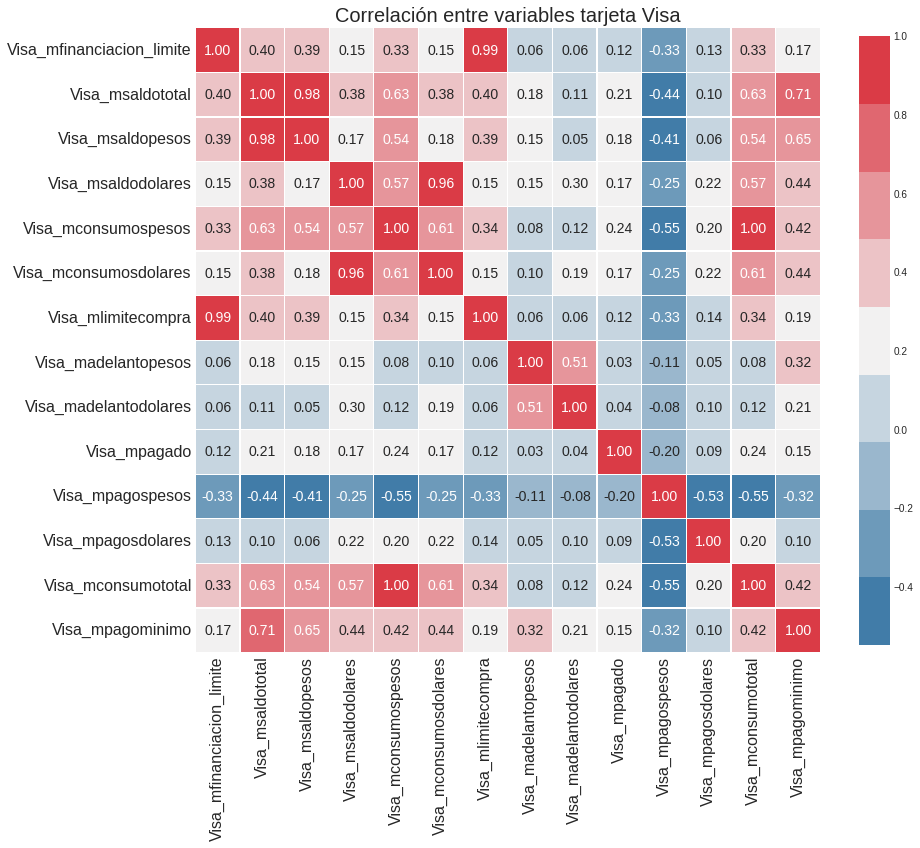

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_visa, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# SELECCIONAMOS AQUELLAS VARIABLES CON UNA CORRELACION MAYOR A 0.7 O MENOR A -0.7

for i in visa:
    for j in visa:
        if corr_visa[i] [j] !=1 and (corr_visa[i] [j] > 0.7 or corr_visa[i] [j] < -0.7):
            print(f'{i} - {j}: {round(corr_visa[i] [j], 2)}')

Visa_mfinanciacion_limite - Visa_mlimitecompra: 0.99
Visa_msaldototal - Visa_msaldopesos: 0.98
Visa_msaldototal - Visa_mpagominimo: 0.71
Visa_msaldopesos - Visa_msaldototal: 0.98
Visa_msaldodolares - Visa_mconsumosdolares: 0.96
Visa_mconsumosdolares - Visa_msaldodolares: 0.96
Visa_mlimitecompra - Visa_mfinanciacion_limite: 0.99
Visa_mpagominimo - Visa_msaldototal: 0.71


In [ ]:
# Se eliminan:
    # "Visa_mlimitecompra", "Visa_msaldopesos", "Visa_mpagominimo", "Visa_mconsumosdolares", "Visa_mconsumospesos", "Visa_mpagospesos"

visa_final = ['Visa_mfinanciacion_limite', 'Visa_msaldopesos', 'Visa_msaldodolares', 'Visa_madelantopesos', 
        'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagosdolares', 'Visa_mconsumototal']

In [ ]:
# SE CORRE LA MATRIZ NUEVAMENTE PARA VERIFICAR QUE NO EXISTAN CORRELACIONES FUERTES

corr_visa_final = df3[visa_final].dropna().corr(method = 'pearson')

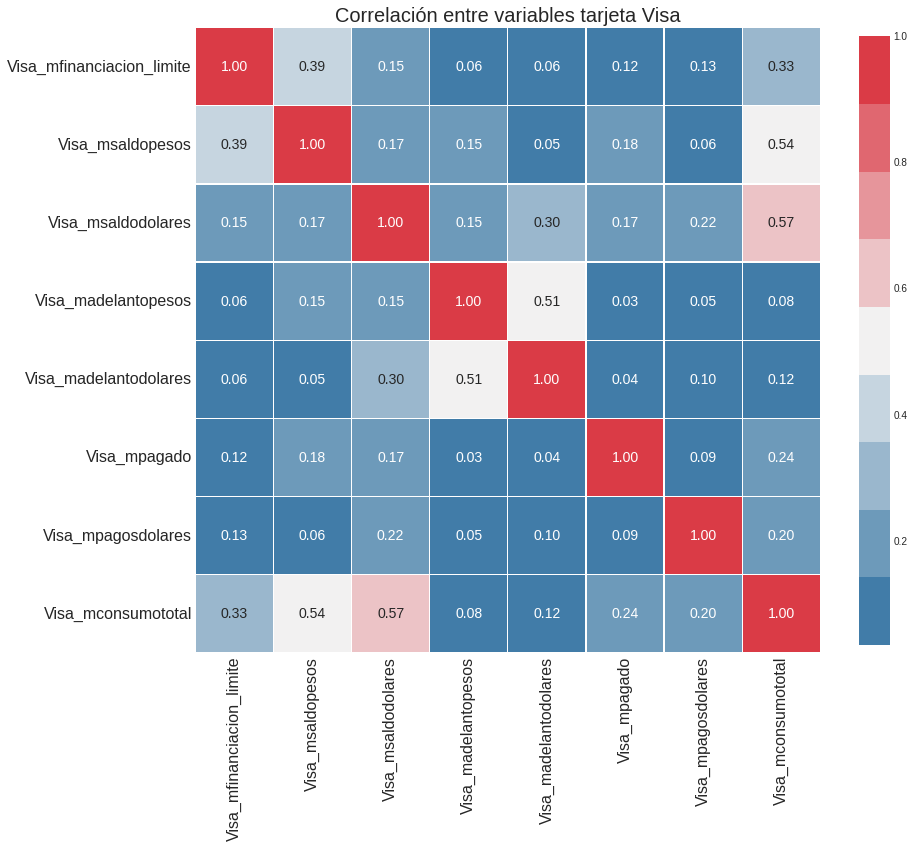

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_visa_final, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# Genero el drop

drop_11 = ["Visa_mlimitecompra", "Visa_msaldopesos", "Visa_mpagominimo", "Visa_mconsumosdolares", "Visa_mconsumospesos", "Visa_mpagospesos"]
df3 = df3.drop(drop_11, axis = 1)

In [ ]:
# VARIABLES RELACIONADAS CON TARJETA MASTER
# LA INTENCION ES GENERAR UN HEATMAP Y ELIMINAR CORRELACIONES
# SOLO CON VARIABLES NUMERICAS

variables_master = ['Master_marca_atraso', 'Master_cuenta_estado', 'Master_mfinanciacion_limite', 'Master_msaldototal',
                    'Master_msaldopesos', 'Master_msaldodolares', 'Master_mlimitecompra', 'Master_mpagado',
                    'Master_tconsumos', 'Master_tadelantosefectivo', 'Master_mpagominimo']

In [ ]:
# CORRO LA FUNCION PARA FIJARME QUÉ VARIABLES SON NUMÉRICAS
    # "Master_marca_atraso", "Master_cuenta_estado", "Master_tconsumos", "Master_tadelantosefectivo"
        # Estas variable son categóricas, por lo que no entran en el HEATMAP
unique_values(df3[variables_master])

Master_marca_atraso 
 [0. 1.] 

Master_cuenta_estado 
 [10. 11. 12. 19.] 

Master_mfinanciacion_limite 
 [0.00000000e+00 5.89680000e+02 7.37100000e+02 8.84520000e+02
 1.03194000e+03 1.10565000e+03 1.17936000e+03 1.32678000e+03
 1.47420000e+03 1.54791000e+03 1.76904000e+03 2.06388000e+03
 2.21130000e+03 2.27448000e+03 2.65356000e+03 2.84310000e+03
 3.09582000e+03 3.41172000e+03 3.98034000e+03 4.21200000e+03
 4.26465000e+03 5.11758000e+03 5.26500000e+03 5.54346000e+03
 5.97051000e+03 6.31800000e+03 6.65262000e+03 7.37100000e+03
 7.89750000e+03 8.21340000e+03 8.42400000e+03 9.47700000e+03
 1.02667500e+04 1.05300000e+04 1.10565000e+04 1.15830000e+04
 1.23201000e+04 1.26360000e+04 1.42155000e+04 1.43734500e+04
 1.47420000e+04 1.57950000e+04 1.64268000e+04 1.89540000e+04
 2.00070000e+04 2.04282000e+04 2.05335000e+04 2.13232500e+04
 2.21130000e+04 2.42190000e+04 2.46402000e+04 2.52720000e+04
 2.71602800e+04 2.74366900e+04 2.84310000e+04 2.86599400e+04
 2.87469000e+04 2.97631100e+04 2.99259900

In [ ]:
master = ['Master_mfinanciacion_limite', 'Master_msaldototal', 'Master_msaldopesos', 
          'Master_msaldodolares', 'Master_mlimitecompra', 'Master_mpagado', 'Master_mpagominimo']

In [ ]:
corr_master = df3[master].dropna().corr(method = 'pearson')

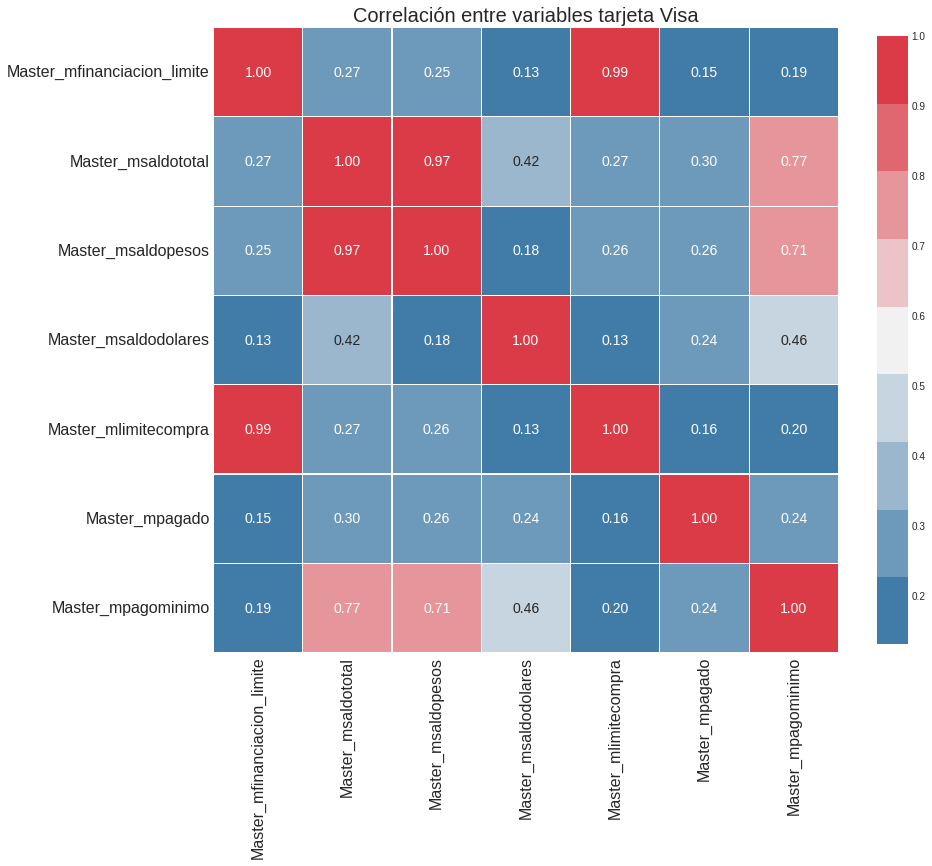

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_master, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# SELECCIONAMOS AQUELLAS VARIABLES CON UNA CORRELACION MAYOR A 0.7 O MENOR A -0.7

for i in master:
    for j in master:
        if corr_master[i] [j] !=1 and (corr_master[i] [j] > 0.7 or corr_master[i] [j] < -0.7):
            print(f'{i} - {j}: {round(corr_master[i] [j], 2)}')

Master_mfinanciacion_limite - Master_mlimitecompra: 0.99
Master_msaldototal - Master_msaldopesos: 0.97
Master_msaldototal - Master_mpagominimo: 0.77
Master_msaldopesos - Master_msaldototal: 0.97
Master_msaldopesos - Master_mpagominimo: 0.71
Master_mlimitecompra - Master_mfinanciacion_limite: 0.99
Master_mpagominimo - Master_msaldototal: 0.77
Master_mpagominimo - Master_msaldopesos: 0.71


In [ ]:
# Se eliminan:
    # "Master_mlimitecompra", "Master_msaldopesos", "Master_mpagominimo"

master_final = ['Master_mfinanciacion_limite', 'Master_msaldototal', 'Master_msaldodolares', 'Master_mpagado']

In [ ]:
# SE CORRE LA MATRIZ NUEVAMENTE PARA VERIFICAR QUE NO EXISTAN CORRELACIONES FUERTES

corr_master_final = df3[master_final].dropna().corr(method = 'pearson')

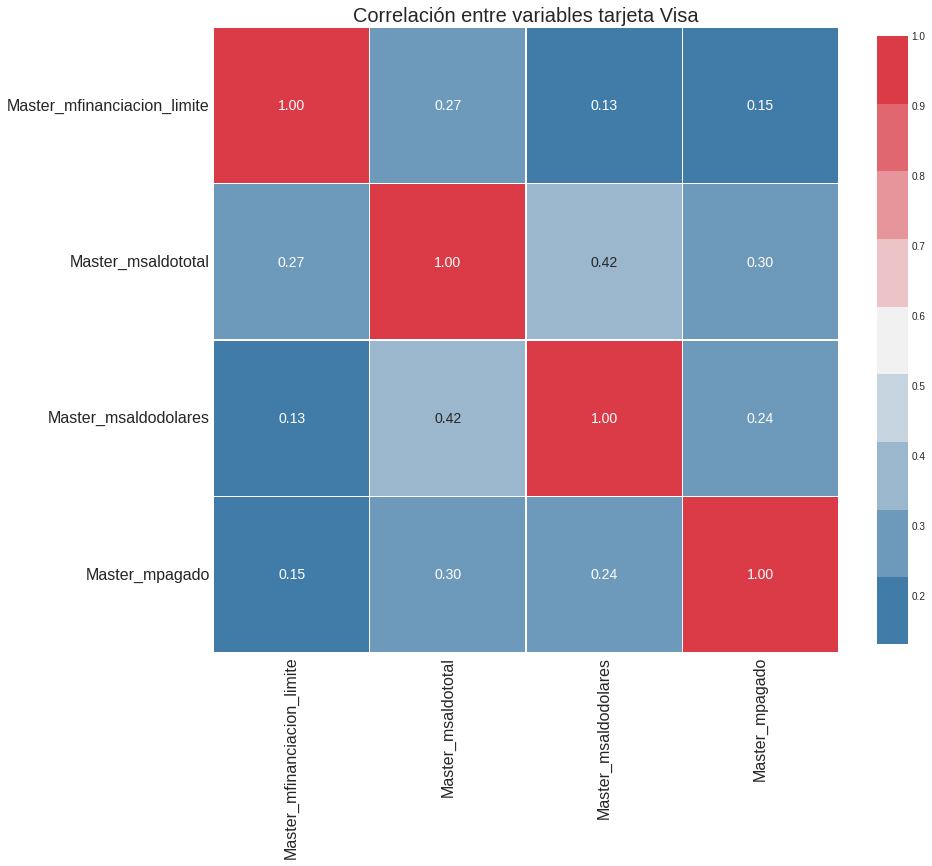

In [ ]:
plt.style.use("seaborn-white")

fig, ax = plt.subplots(figsize = (14, 14))

cmap = sns.diverging_palette(240, 10, n = 9, center = 'light')

sns.heatmap(corr_master_final, linewidths =.2, cmap = cmap, cbar_kws = {"shrink": .8}, square = True, xticklabels = True, yticklabels = True, annot = True, annot_kws = {'size': 14}, fmt = '.2f');

plt.title("Correlación entre variables tarjeta Visa", fontsize = 20)
plt.yticks(fontsize =  16, rotation = 0) 
plt.xticks(fontsize = 16, rotation = 90)

plt.show()

In [ ]:
# Genero el drop

drop_12 = ["Master_mlimitecompra", "Master_msaldopesos", "Master_mpagominimo"]
df3 = df3.drop(drop_12, axis = 1)

In [ ]:
# Unificamos los descuentos como "mdescuento"

df3["mdescuentos"] = df3["mcajeros_propios_descuentos"] + df3["mtarjeta_visa_descuentos"] + df3["mtarjeta_master_descuentos"] 

In [ ]:
# Genero el drop

drop_13 = ["mcajeros_propios_descuentos", "mtarjeta_visa_descuentos", "mtarjeta_master_descuentos"]
df3 = df3.drop(drop_13, axis = 1)

In [ ]:
# Se unifica como "tdescuento"

df3["tdescuento"] = np.where(df3[["ccajeros_propios_descuentos", "ctarjeta_visa_descuentos", "ctarjeta_master_descuentos"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_14 = ["ccajeros_propios_descuentos", "ctarjeta_visa_descuentos", "ctarjeta_master_descuentos"]
df3 = df3.drop(drop_14, axis = 1)

In [ ]:
# Unificamos los descuentos como "mcomision"

df3["mcomision"] = df3["mcomisiones_mantenimiento"] + df3["mcomisiones_otras"] 

In [ ]:
# Genero el drop

drop_15 = ["mcomisiones_mantenimiento", "mcomisiones_otras"]
df3 = df3.drop(drop_15, axis = 1)

In [ ]:
# Se unifica como "ccomision"

df3["ccomision"] = df3["ccomisiones_mantenimiento"] + df3["ccomisiones_otras"]

In [ ]:
# Genero el drop

drop_16 = ["ccomisiones_mantenimiento", "ccomisiones_otras"]
df3 = df3.drop(drop_16, axis = 1)

In [ ]:
# Con esto corroboro que puedo dropear la columna "tcambio_monedas" 

mask_tcambio = df3["tcambio_monedas"] == 1
mask_ccambio = (df3["ccambio_monedas_compra"] == 0) & (df3["ccambio_monedas_venta"] == 0)


df3[mask_tcambio & mask_ccambio]

,Unnamed: 0,numero_de_cliente,marketing_activo_ultimos90dias,cliente_vip,cliente_sucursal,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,mactivos_margen,mpasivos_margen,marketing_coss_selling,mcaja_ahorro_dolares,mdescubierto_preacordado,mcuentas_saldo,ttarjeta_debito,ctarjeta_debito_transacciones,mautoservicio,ttarjeta_visa,ttarjeta_master,tcaja_seguridad,tplan_sueldo,mplan_sueldo,cplan_sueldo_transaccion,tcambio_monedas,ccambio_monedas_compra,mcambio_monedas_compra,ccambio_monedas_venta,mcambio_monedas_venta,ctransferencias_recibidas,mtransferencias_recibidas,ctransferencias_emitidas,mtransferencias_emitidas,cextraccion_autoservicio,mextraccion_autoservicio,ccheques_depositados,mcheques_depositados,ccheques_emitidos,mcheques_emitidos,ccheques_depositados_rechazados,mcheques_depositados_rechazados,ccheques_emitidos_rechazados,mcheques_emitidos_rechazados,tcallcenter,ccallcenter_transacciones,thomebanking,chomebanking_transacciones,tautoservicio,cautoservicio_transacciones,tcajas,tcajas_depositos,tcajas_extracciones,tcajas_otras,ccajeros_propio_transacciones,mcajeros_propio,ccajeros_ajenos_transacciones,mcajeros_ajenos,tmovimientos_ultimos90dias,Master_marca_atraso,Master_cuenta_estado,Master_mfinanciacion_limite,Master_msaldototal,Master_msaldodolares,Master_mpagado,Master_tconsumos,Master_tadelantosefectivo,Visa_marca_atraso,Visa_cuenta_estado,Visa_mfinanciacion_limite,Visa_msaldototal,Visa_msaldodolares,Visa_madelantopesos,Visa_madelantodolares,Visa_mpagado,Visa_mpagosdolares,Visa_mconsumototal,Visa_tconsumos,Visa_tadelantosefectivo,target,target_bin,tdescubierto_preacordado,mcaja_ahorro_CC,mtarjeta_all_consumo,ctarjeta_all_transacciones,cprestamos_all,mprestamos_all,renta_dolar,renta_pesos,tpaquete,tcuenta,trenta,tseguro,tdebitos_automaticos,mdebitos_automaticos,mdescuentos,tdescuento,mcomision,ccomision


In [ ]:
df3 = df3.drop("tcambio_monedas", axis = 1)

In [ ]:
# Creamos "ccambio_venta_compra"

df3["ccambio_venta_compra"] = df3["ccambio_monedas_venta"] - df3["ccambio_monedas_compra"]

In [ ]:
# Genero el drop

drop_17 = ["ccambio_monedas_venta", "ccambio_monedas_compra"]
df3 = df3.drop(drop_17, axis = 1)

In [ ]:
# Creamos "mcambio_venta_compra"

df3["mcambio_venta_compra"] = df3["mcambio_monedas_venta"] - df3["mcambio_monedas_compra"]

In [ ]:
drop_18 = ["mcambio_monedas_venta", "mcambio_monedas_compra"]
df3 = df3.drop(drop_18, axis = 1)

In [ ]:
# Creamos "ctransferencia_emitida_recibida"

df3["ctransferencia_emitida_recibida"] = df3["ctransferencias_emitidas"] - df3["ctransferencias_recibidas"]

In [ ]:
# Genero el drop

drop_19 = ["ctransferencias_emitidas", "ctransferencias_recibidas"]
df3 = df3.drop(drop_19, axis = 1)

In [ ]:
# Creamos "mtransferencia_emitida_recibida"

df3["mtransferencia_emitida_recibida"] = df3["mtransferencias_emitidas"] - df3["mtransferencias_recibidas"]

In [ ]:
# Genero el drop

drop_20 = ["mtransferencias_emitidas", "mtransferencias_recibidas"]
df3 = df3.drop(drop_20, axis = 1)

In [ ]:
# Creamos "ccheques_emitido_depositado"

df3["ccheques_emitido_depositado"] = df3["ccheques_emitidos"] - df3["ccheques_depositados"]

In [ ]:
# Genero el drop

drop_21 = ["ccheques_emitidos", "ccheques_depositados"]
df3 = df3.drop(drop_21, axis = 1)

In [ ]:
# Creamos "mcheques_emitido_depositado"

df3["mcheques_emitido_depositado"] = df3["mcheques_emitidos"] - df3["mcheques_depositados"]

In [ ]:
# Genero el drop

drop_22 = ["mcheques_emitidos", "mcheques_depositados"]
df3 = df3.drop(drop_22, axis = 1)

In [ ]:
# Creamos "ccheques_emitido_depositado_r"

df3["ccheques_emitido_depositado_r"] = df3["ccheques_emitidos_rechazados"] - df3["ccheques_depositados_rechazados"]

In [ ]:
# Genero el drop

drop_23 = ["ccheques_emitidos_rechazados", "ccheques_depositados_rechazados"]
df3 = df3.drop(drop_23, axis = 1)

In [ ]:
# Creamos "mcheques_emitido_depositado_r"

df3["mcheques_emitido_depositado_r"] = df3["mcheques_emitidos_rechazados"] - df3["mcheques_depositados_rechazados"]

In [ ]:
# Genero el drop

drop_24 = ["mcheques_emitidos_rechazados", "mcheques_depositados_rechazados"]
df3 = df3.drop(drop_24, axis = 1)

In [ ]:
# Creamos "ttransacciones"

df3["ttransacciones"] = np.where(df3[["tcallcenter", "thomebanking", "tautoservicio"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_25 = ["tcallcenter", "thomebanking", "tautoservicio"]
df3 = df3.drop(drop_25, axis = 1)

In [ ]:
# Creamos "ctransacciones"

df3["ctransacciones"] = df3["ccallcenter_transacciones"] + df3["chomebanking_transacciones"] + df3["cautoservicio_transacciones"]

In [ ]:
# Genero el drop

drop_26 = ["ccallcenter_transacciones", "chomebanking_transacciones", "cautoservicio_transacciones"]
df3 = df3.drop(drop_26, axis = 1)

In [ ]:
# Creamos "tcajas_total"

df3["tcajas_total"] = np.where(df3[["tcajas", "tcajas_depositos", "tcajas_extracciones", "tcajas_otras"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_27 = ["tcajas", "tcajas_depositos", "tcajas_extracciones", "tcajas_otras"]
df3 = df3.drop(drop_27, axis = 1)

In [ ]:
# Creamos "tcajero_transaccion"

df3["tcajero_transaccion"] = np.where(df3[["ccajeros_propio_transacciones", "ccajeros_ajenos_transacciones"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_28 = ["ccajeros_propio_transacciones", "ccajeros_ajenos_transacciones"]
df3 = df3.drop(drop_28, axis = 1)

In [ ]:
# Creamos "mcajero_transaccion"

df3["mcajero_transaccion"] = df3["mcajeros_propio"] + df3["mcajeros_ajenos"]

In [ ]:
# Genero el drop

drop_29 = ["mcajeros_propio", "mcajeros_ajenos"]
df3 = df3.drop(drop_29, axis = 1)

In [ ]:
# Creamos "ttarjeta_visa_master"

df3["ttarjeta_visa_master"] = np.where(df3[["ttarjeta_visa", "ttarjeta_master"]].sum(axis = 1) != 0, 1, 0)

In [ ]:
# Genero el drop

drop_30 = ["ttarjeta_visa", "ttarjeta_master"]
df3 = df3.drop(drop_30, axis = 1)

In [ ]:
df3["mdescubierto_preacordado"]

6         1.17
9         1.17
12        1.17
15        1.17
18        1.17
          ... 
549858    0.00
549859    1.17
549860    1.17
549861    1.17
549862    1.17
Name: mdescubierto_preacordado, Length: 184539, dtype: float64

In [ ]:
df3["mdescubierto_preacordado"] = df3["mdescubierto_preacordado"].replace({1.17: 1})

In [ ]:
df4 = df3.copy()

In [ ]:
# Creamos una lista con todas las variables numéricas

numericas = ["cliente_edad", "cliente_antiguedad", "mrentabilidad", "mrentabilidad_annual", "mcomisiones",
             "mactivos_margen", "mpasivos_margen", "mcaja_ahorro_dolares", "mcuentas_saldo", 
             "ctarjeta_debito_transacciones", "mautoservicio", "mplan_sueldo", "cplan_sueldo_transaccion",
            "cextraccion_autoservicio", "mextraccion_autoservicio", "Master_mfinanciacion_limite",
            "Master_msaldototal", "Master_msaldodolares", "Master_mpagado", "Visa_mfinanciacion_limite",
            "Visa_msaldototal", "Visa_msaldodolares", "Visa_madelantopesos", "Visa_madelantodolares",
            "Visa_mpagado", "Visa_mpagosdolares", "Visa_mconsumototal", "mcaja_ahorro_CC", "mtarjeta_all_consumo",
            "cprestamos_all", "mprestamos_all", "renta_dolar", "renta_pesos", "mdebitos_automaticos",
            "mdescuentos", "mcomision", "ccomision", "ccambio_venta_compra", "mcambio_venta_compra", 
            "ctransferencia_emitida_recibida", "mtransferencia_emitida_recibida", "ccheques_emitido_depositado",
            "mcheques_emitido_depositado", "ccheques_emitido_depositado_r", "mcheques_emitido_depositado_r",
            "ctransacciones", "mcajero_transaccion", "ctarjeta_all_transacciones"]

In [ ]:
categoricas = ["marketing_activo_ultimos90dias", "cliente_vip", "cliente_sucursal", "marketing_coss_selling",
               "mdescubierto_preacordado", "ttarjeta_debito", "tcaja_seguridad", "tplan_sueldo",
               "tmovimientos_ultimos90dias", "Master_marca_atraso", "Master_cuenta_estado", "Master_tconsumos",
               "Master_tadelantosefectivo", "Visa_marca_atraso", "Visa_cuenta_estado", "Visa_tconsumos",
               "Visa_tadelantosefectivo", "tdescubierto_preacordado", "tpaquete",
               "tcuenta", "trenta", "tseguro", "tdebitos_automaticos", "tdescuento", "ttransacciones", "tcajas_total",
               "tcajero_transaccion", "ttarjeta_visa_master"]

## 3. Dummies

### A. marketing_coss_selling

In [ ]:
df4["marketing_coss_selling"] = df4["marketing_coss_selling"].astype("str")

In [ ]:
list_marketing_coss_selling = ["7", "6", "8", "5", "9"]

In [ ]:
mask_marketing_coss_selling = df4["marketing_coss_selling"].isin(list_marketing_coss_selling) == False

In [ ]:
df4["marketing_coss_selling"][mask_marketing_coss_selling] = "otros"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4["marketing_coss_selling"].unique()

array(['9', 'otros', '6', '8', '7', '5'], dtype=object)

### B. cliente_sucursal

In [ ]:
df4["cliente_sucursal"] = df4["cliente_sucursal"].astype("str")

In [ ]:
list_cliente_sucursal = ["2", "209", "422", "545", "50", "941", "548", "128", "227", "1436"]

In [ ]:
mask_cliente_sucursal = df4["cliente_sucursal"].isin(list_cliente_sucursal) == False

In [ ]:
df4["cliente_sucursal"][mask_cliente_sucursal] = "otros"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df4["cliente_sucursal"].unique()

array(['otros', '227', '545', '50', '2', '941', '1436', '128', '209',
       '548', '422'], dtype=object)

### C. cliente_edad

In [ ]:
bins_edad = [0,20,40,60,80,110]
labels_edad = ['<20','21-40','41-60','61-80','>80']
df4['edad_bin'] = pd.cut(df4['cliente_edad'], bins = bins_edad, labels = labels_edad, right=False)

In [ ]:
df4['edad_bin'].unique()

['61-80', '41-60', '21-40', '>80', '<20']
Categories (5, object): ['<20' < '21-40' < '41-60' < '61-80' < '>80']

In [ ]:
df4['edad_bin'] = df4['edad_bin'].astype("str")

### D. cliente_antiguedad

In [ ]:
bins_antiguedad = [0,20,40,60,80,110]
labels_antiguedad = ['<20','21-40','41-60','61-80','>80']
df4['antiq_bin'] = pd.cut(df4['cliente_antiguedad'], bins = bins_antiguedad, labels = labels_antiguedad, right = False)

In [ ]:
df4['antiq_bin'].unique()

[NaN, '>80', '41-60', '<20', '61-80', '21-40']
Categories (5, object): ['<20' < '21-40' < '41-60' < '61-80' < '>80']

In [ ]:
df4['antiq_bin'] = df4['antiq_bin'].astype("str")

### E. Creo las dummies

In [ ]:
df4[["Master_cuenta_estado", "Visa_cuenta_estado"]] =  df4[["Master_cuenta_estado", "Visa_cuenta_estado"]].astype("str")

In [ ]:
para_encoder = ["edad_bin", "antiq_bin", "cliente_sucursal", "marketing_coss_selling", "Master_cuenta_estado", "Visa_cuenta_estado"]

In [ ]:
df4[para_encoder].dtypes

edad_bin                  object
antiq_bin                 object
cliente_sucursal          object
marketing_coss_selling    object
Master_cuenta_estado      object
Visa_cuenta_estado        object
dtype: object

In [ ]:
enc = OneHotEncoder(drop = "first")
X = df4[para_encoder]
enc.fit(X)
enc.categories_

[array(['21-40', '41-60', '61-80', '<20', '>80'], dtype=object),
 array(['21-40', '41-60', '61-80', '<20', '>80', 'nan'], dtype=object),
 array(['128', '1436', '2', '209', '227', '422', '50', '545', '548', '941',
        'otros'], dtype=object),
 array(['5', '6', '7', '8', '9', 'otros'], dtype=object),
 array(['10.0', '11.0', '12.0', '19.0'], dtype=object),
 array(['10.0', '11.0', '12.0', '19.0'], dtype=object)]

In [ ]:
dummies = enc.transform(X).toarray()

In [ ]:
dummies_df = pd.DataFrame(dummies)
dummies_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
col_names = [para_encoder[i] + '_' + enc.categories_[i] for i in range(len(para_encoder))] 
col_names

[array(['edad_bin_21-40', 'edad_bin_41-60', 'edad_bin_61-80',
        'edad_bin_<20', 'edad_bin_>80'], dtype=object),
 array(['antiq_bin_21-40', 'antiq_bin_41-60', 'antiq_bin_61-80',
        'antiq_bin_<20', 'antiq_bin_>80', 'antiq_bin_nan'], dtype=object),
 array(['cliente_sucursal_128', 'cliente_sucursal_1436',
        'cliente_sucursal_2', 'cliente_sucursal_209',
        'cliente_sucursal_227', 'cliente_sucursal_422',
        'cliente_sucursal_50', 'cliente_sucursal_545',
        'cliente_sucursal_548', 'cliente_sucursal_941',
        'cliente_sucursal_otros'], dtype=object),
 array(['marketing_coss_selling_5', 'marketing_coss_selling_6',
        'marketing_coss_selling_7', 'marketing_coss_selling_8',
        'marketing_coss_selling_9', 'marketing_coss_selling_otros'],
       dtype=object),
 array(['Master_cuenta_estado_10.0', 'Master_cuenta_estado_11.0',
        'Master_cuenta_estado_12.0', 'Master_cuenta_estado_19.0'],
       dtype=object),
 array(['Visa_cuenta_estado_10.0', 'Visa

In [ ]:
col_names_drop_first = [sublist[i] for sublist in col_names for i in range(len(sublist)) if i != 0]
col_names_drop_first

['edad_bin_41-60',
 'edad_bin_61-80',
 'edad_bin_<20',
 'edad_bin_>80',
 'antiq_bin_41-60',
 'antiq_bin_61-80',
 'antiq_bin_<20',
 'antiq_bin_>80',
 'antiq_bin_nan',
 'cliente_sucursal_1436',
 'cliente_sucursal_2',
 'cliente_sucursal_209',
 'cliente_sucursal_227',
 'cliente_sucursal_422',
 'cliente_sucursal_50',
 'cliente_sucursal_545',
 'cliente_sucursal_548',
 'cliente_sucursal_941',
 'cliente_sucursal_otros',
 'marketing_coss_selling_6',
 'marketing_coss_selling_7',
 'marketing_coss_selling_8',
 'marketing_coss_selling_9',
 'marketing_coss_selling_otros',
 'Master_cuenta_estado_11.0',
 'Master_cuenta_estado_12.0',
 'Master_cuenta_estado_19.0',
 'Visa_cuenta_estado_11.0',
 'Visa_cuenta_estado_12.0',
 'Visa_cuenta_estado_19.0']

In [ ]:
dummies_df.columns = col_names_drop_first
dummies_df.head()

,edad_bin_41-60,edad_bin_61-80,edad_bin_<20,edad_bin_>80,antiq_bin_41-60,antiq_bin_61-80,antiq_bin_<20,antiq_bin_>80,antiq_bin_nan,cliente_sucursal_1436,cliente_sucursal_2,cliente_sucursal_209,cliente_sucursal_227,cliente_sucursal_422,cliente_sucursal_50,cliente_sucursal_545,cliente_sucursal_548,cliente_sucursal_941,cliente_sucursal_otros,marketing_coss_selling_6,marketing_coss_selling_7,marketing_coss_selling_8,marketing_coss_selling_9,marketing_coss_selling_otros,Master_cuenta_estado_11.0,Master_cuenta_estado_12.0,Master_cuenta_estado_19.0,Visa_cuenta_estado_11.0,Visa_cuenta_estado_12.0,Visa_cuenta_estado_19.0
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Arreglar porque agrega filas!!
df4 = pd.concat([df4["numero_de_cliente"].reset_index(drop=True), df4[numericas].reset_index(drop=True), df4[categoricas].reset_index(drop=True), dummies_df.reset_index(drop=True)], axis = 1)

In [ ]:
df4 = df4.drop(["marketing_coss_selling", "cliente_sucursal", "Master_cuenta_estado", "Visa_cuenta_estado"], axis = 1)

In [ ]:
df4.shape

(184539, 103)

In [ ]:
lista_df_final = ['mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen', 'mcaja_ahorro_dolares',
       'mcuentas_saldo', 'mautoservicio', 'mplan_sueldo',
       'mextraccion_autoservicio', 'Master_mfinanciacion_limite',
       'Master_msaldodolares', 'Master_mpagado', 'Visa_mfinanciacion_limite',
       'Visa_msaldototal', 'Visa_msaldodolares', 'Visa_madelantopesos',
       'Visa_madelantodolares', 'Visa_mpagado', 'Visa_mpagosdolares',
       'Visa_mconsumototal', 'mcaja_ahorro_CC', 'mtarjeta_all_consumo',
       'mprestamos_all', 'renta_dolar', 'mdebitos_automaticos', 'mdescuentos',
       'mcomision', 'mcambio_venta_compra', 'mtransferencia_emitida_recibida',
       'mcheques_emitido_depositado', 'mcheques_emitido_depositado_r',
       'mcajero_transaccion', 'marketing_activo_ultimos90dias',
       'mdescubierto_preacordado', 'Master_marca_atraso', 'Visa_marca_atraso',
       'edad_bin_>80', 'antiq_bin_<20', 'antiq_bin_nan',
       'cliente_sucursal_1436', 'cliente_sucursal_209', 'cliente_sucursal_422',
       'cliente_sucursal_545', 'cliente_sucursal_941',
       'cliente_sucursal_otros', 'marketing_coss_selling_6',
       'marketing_coss_selling_7', 'marketing_coss_selling_8',
       'marketing_coss_selling_9', 'marketing_coss_selling_otros',
       'Master_cuenta_estado_11.0', 'Master_cuenta_estado_12.0',
       'Master_cuenta_estado_19.0', 'Visa_cuenta_estado_11.0',
       'Visa_cuenta_estado_12.0', 'Visa_cuenta_estado_19.0',
       'numero_de_cliente', 'cliente_antiguedad',
       'ctarjeta_debito_transacciones', 'cextraccion_autoservicio',
       'cprestamos_all', 'ccomision', 'ccambio_venta_compra',
       'ctransferencia_emitida_recibida', 'ccheques_emitido_depositado',
       'ccheques_emitido_depositado_r', 'ctransacciones',
       'ctarjeta_all_transacciones', 'ttarjeta_debito', 'tcaja_seguridad',
       'tplan_sueldo', 'tmovimientos_ultimos90dias',
       'Master_tadelantosefectivo', 'Visa_tconsumos',
       'Visa_tadelantosefectivo', 'tdescubierto_preacordado', 'tpaquete',
       'tcuenta', 'trenta', 'tseguro', 'tdebitos_automaticos', 'tdescuento',
       'ttransacciones', 'tcajas_total', 'tcajero_transaccion',
       'ttarjeta_visa_master']


In [ ]:
df4.columns

Index(['numero_de_cliente', 'cliente_edad', 'cliente_antiguedad',
       'mrentabilidad', 'mrentabilidad_annual', 'mcomisiones',
       'mactivos_margen', 'mpasivos_margen', 'mcaja_ahorro_dolares',
       'mcuentas_saldo',
       ...
       'marketing_coss_selling_7', 'marketing_coss_selling_8',
       'marketing_coss_selling_9', 'marketing_coss_selling_otros',
       'Master_cuenta_estado_11.0', 'Master_cuenta_estado_12.0',
       'Master_cuenta_estado_19.0', 'Visa_cuenta_estado_11.0',
       'Visa_cuenta_estado_12.0', 'Visa_cuenta_estado_19.0'],
      dtype='object', length=103)

In [ ]:
lista_df4 = list(df4.columns)

In [ ]:
lista_df4

['numero_de_cliente',
 'cliente_edad',
 'cliente_antiguedad',
 'mrentabilidad',
 'mrentabilidad_annual',
 'mcomisiones',
 'mactivos_margen',
 'mpasivos_margen',
 'mcaja_ahorro_dolares',
 'mcuentas_saldo',
 'ctarjeta_debito_transacciones',
 'mautoservicio',
 'mplan_sueldo',
 'cplan_sueldo_transaccion',
 'cextraccion_autoservicio',
 'mextraccion_autoservicio',
 'Master_mfinanciacion_limite',
 'Master_msaldototal',
 'Master_msaldodolares',
 'Master_mpagado',
 'Visa_mfinanciacion_limite',
 'Visa_msaldototal',
 'Visa_msaldodolares',
 'Visa_madelantopesos',
 'Visa_madelantodolares',
 'Visa_mpagado',
 'Visa_mpagosdolares',
 'Visa_mconsumototal',
 'mcaja_ahorro_CC',
 'mtarjeta_all_consumo',
 'cprestamos_all',
 'mprestamos_all',
 'renta_dolar',
 'renta_pesos',
 'mdebitos_automaticos',
 'mdescuentos',
 'mcomision',
 'ccomision',
 'ccambio_venta_compra',
 'mcambio_venta_compra',
 'ctransferencia_emitida_recibida',
 'mtransferencia_emitida_recibida',
 'ccheques_emitido_depositado',
 'mcheques_emit

In [ ]:
len(lista_df_final), len(lista_df4)

(87, 103)

In [ ]:
lista_drop = []
for i in lista_df4:
    if i in lista_df_final:
        lista_drop.append(i)
len(lista_drop)

87

In [ ]:
df4['cliente_edad']

0         62.0
1         65.0
2         41.0
3         44.0
4         49.0
          ... 
184534    41.0
184535    59.0
184536    61.0
184537    22.0
184538    39.0
Name: cliente_edad, Length: 184539, dtype: float64

In [ ]:
df4 = df4[lista_drop]

In [ ]:
df4.shape

(184539, 87)

In [ ]:
df4.to_csv("/content/drive/My Drive/DataScience/Banco/banco_to_model_201404.csv")